First 5 rows of the dataset : 
              area_type   availability                  location  \
0  Super built-up  Area         19-Dec  Electronic City Phase II   
1            Plot  Area  Ready To Move          Chikka Tirupathi   
2        Built-up  Area  Ready To Move               Uttarahalli   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli   
4  Super built-up  Area  Ready To Move                  Kothanur   

   number of rooms  society  size  bath  balcony  price  
0              2.0  Coomee   1056   2.0      1.0   39.0  
1              4.0  Theanmp  2600   5.0      3.0  120.0  
2              3.0      NaN  1440   2.0      3.0   62.0  
3              3.0  Soiewre  1521   3.0      1.0   95.0  
4              2.0      NaN  1200   2.0      1.0   51.0  

Dataset Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ------------

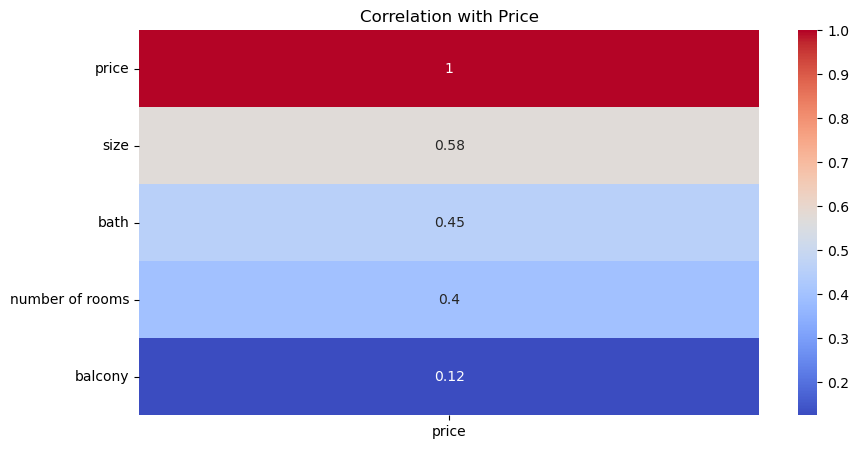


Training set size :  (10618, 1385)

Testing set size :  (2655, 1385)

Model Coefficients :  [-187.58567514 2624.00269251   25.60107842 ...   66.99561107   -7.08237969
  -37.88872206]

Intercept :  -19.98314398237362
Root Mean Square Error (RMSE): 109.20
R² Score: 0.52


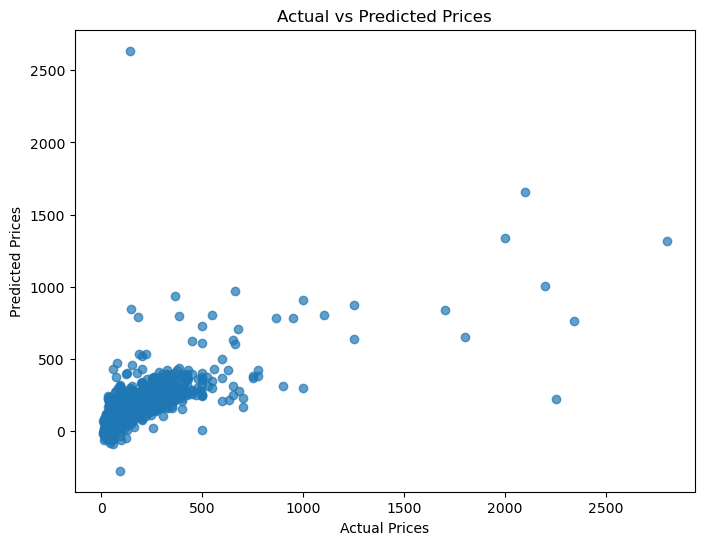

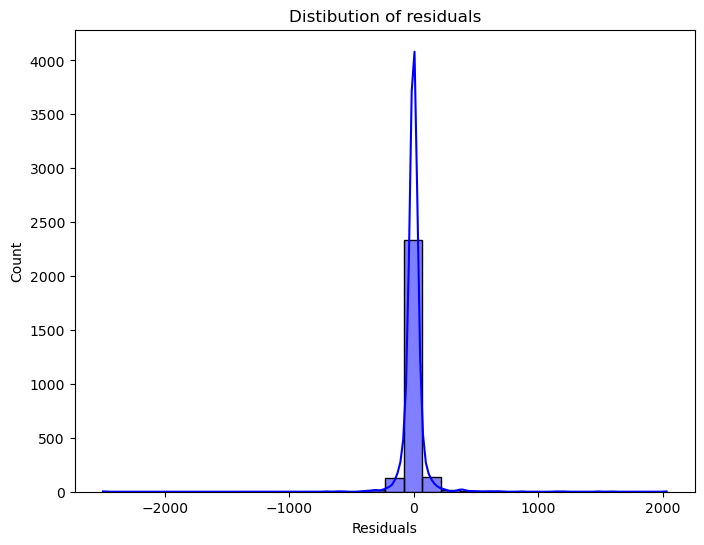

In [58]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load the dataset
df = pd.read_csv("C:/Users/NAVADEEP/OneDrive/Pictures/Documents/Main flow/Task 4/house_prices1.csv")
print("First 5 rows of the dataset : ")
print(df.head())

# Dataset info
print("\nDataset Information : ")
print(df.info())

# Check for missing values
print("\nMissing values before cleaning: ")
print(df.isnull().sum())

# Drop columns with too many missing values
df.drop(['society'], axis=1, inplace=True)

# Fill Missing values
df['number of rooms'].fillna(df['number of rooms'].median(), inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)
df['balcony'].fillna(df['balcony'].median(), inplace=True)
df.dropna(inplace=True)

# Check for missing values
print("\nMissing values after cleaning: ")
print(df.isnull().sum())

# Data Preprocessing
def convert_size(value):
    if isinstance(value, str):
        if '-' in value:
            low, high = value.split('-')
            return (float(low.strip()) + float(high.strip())) / 2
        try:
            return float(value.strip())
        except:
            return np.nan
    return value

# Apply the function
df['size'] = df['size'].apply(convert_size)

# Drop rows where 'size' is still missing or invalid
df.dropna(subset=['size'], inplace=True)

# Ensure 'size' is float
df['size'] = df['size'].astype(float)

# Normalize Numerical Data: 
# Define column types
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['size','number of rooms']] = scaler.fit_transform(df[['size', 'number of rooms']])

# Feature Selection
X = df.drop('price', axis=1)
y = df['price']

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include='object').columns
print("Categorical columns to encode: ", categorical_cols)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


# Correlation matrix
# Drop non-numeric columns before computing correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(
    corr[['price']].sort_values(by='price', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation with Price')
plt.show()

# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("\nTraining set size : ",X_train.shape)
print("\nTesting set size : ",X_test.shape)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train,y_train)

# Display coefficients
print("\nModel Coefficients : ",model.coef_)
print("\nIntercept : ",model.intercept_)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals,kde=True,bins=30,color='blue')
plt.title("Distibution of residuals")
plt.xlabel("Residuals")
plt.show()